In [28]:

class LMStrainer:
    def __init__(self, d0=0, d1=0, x=[], y=[], taxa=0, limite=0 ):
        self.__delta0 = d0       # hipotese constante
        self.__delta1 = d1       # hipotese coeficiente angular
        self.__x = x            # vetor dados
        self.__y = y            # vetor gabarito
        self.__m = len(y)       # quantidade de testes
        self.__taxa = taxa      # taxa de aprendizado
        self.__limite = limite  # limite do erro do criterio de parada
        self.__it = 0           # iteracoes
        self.__limitIt = 9999999# limite para as iteracoes
    
    
    def hipotese(self, x):
        return self.__delta0 + self.__delta1*x

    def __custo(self):
        error = .0
        for i, x in enumerate(self.__x):
            error += (self.hipotese(x) - self.__y[i])**2
        return error / (2.0*self.__m)

    def __convergiu(self):
        self.__it += 1
        return self.__it == self.__limitIt or self.__custo() <= self.__limite
    
    def __errorSumDelta0(self):
        sum = .0
        for i, x in enumerate(self.__x):
            sum += self.hipotese(x) - self.__y[i]
        return sum
    
    def __errorSumDelta1(self):
        sum = .0
        for i, x in enumerate(self.__x):
            sum += (self.hipotese(x) - self.__y[i]) * x
        return sum
    
    def grad(self):
        # self.__delta0 = delta0
        # self.__delta1 = delta1
        while not self.__convergiu():
            temp0 = self.__delta0 - self.__taxa * (1.0/self.__m) * self.__errorSumDelta0()
            temp1 = self.__delta1 - self.__taxa * (1.0/self.__m) * self.__errorSumDelta1()
            self.__delta0 = temp0
            self.__delta1 = temp1
            # print(self.__delta0, self.__delta1)
        
        if self.__it == self.__limitIt:
            print("ESTOUROU O LIMITE DE ITERACOES")
    
    def getParams(self):
        return self.__delta0, self.__delta1
    

In [25]:
import matplotlib.pyplot as plt

In [26]:
class DrawingGraph:
    
    @staticmethod
    def draw(x, f, title): # valores x e função f
        plt.plot(x, f)
        plt.title(title)
        plt.show()
        

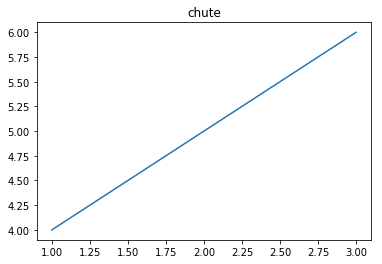

(3.0, 1.0)


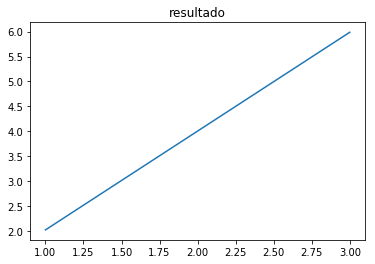

(0.03707730275748688, 1.9836896308796628)


In [33]:

x_train = [1.,2.,3.]
y_train = [2.,4.,6.]
taxa = .1
error = 0.0001
d0 = 3.
d1 = 1.

teste = LMStrainer(d0, d1, x_train, y_train, taxa, error)

DrawingGraph.draw(x_train, [teste.hipotese(x) for x in x_train], "chute")
print(teste.getParams())

teste.grad()

DrawingGraph.draw(x_train, [teste.hipotese(x) for x in x_train], "resultado")
print(teste.getParams())